In [1]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
xl = pd.ExcelFile('SupportCenter.xlsx')
df = xl.parse('SupportPersonnel')
df

C:\Users\nasti\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Employee ID,Avg Tix / Day,Customer rating,Tardies,Graveyard Shifts Taken,Weekend Shifts Taken,Sick Days Taken,% Sick Days Taken on Friday,Employee Dev. Hours,Shift Swaps Requested,Shift Swaps Offered
0,144624,151.8,3.323562,1,0,2,3,0.000000,0,2,1
1,142619,155.2,3.157915,1,3,1,1,0.000000,12,1,2
2,142285,164.2,3.995114,3,3,1,0,0.000000,23,2,0
3,142158,159.0,2.767055,0,3,1,2,0.500000,13,1,0
4,141008,155.5,3.523919,4,1,0,3,0.666667,16,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,139820,162.6,3.373240,2,3,1,1,1.000000,6,1,3
396,144780,159.6,3.504737,1,2,1,2,0.000000,15,1,1
397,138420,155.4,4.285959,3,3,1,2,0.500000,18,1,3
398,131547,150.7,3.986004,1,2,1,4,0.250000,30,2,3


In [3]:
df1=df.drop(['Employee ID'], axis=1)

In [4]:
#стандартизирую данные
scaler = StandardScaler()
scaled_df1 = scaler.fit_transform(df1)
df_scaled=pd.DataFrame(scaled_df1,columns =np.array(df1.columns))

# Результаты работы LOF для k=15

In [5]:
k=15
lof = LocalOutlierFactor(n_neighbors = k,contamination=0.1)

In [6]:
lof15=lof.fit_predict(scaled_df1)
lof.negative_outlier_factor_ #значение LOF для каждого сотрудника

array([-1.21206227, -0.9928016 , -1.15960034, -1.06726213, -1.20024228,
       -1.00780057, -1.05527221, -0.99878698, -1.08256315, -1.26676218,
       -1.00290684, -1.13810921, -0.99897299, -1.08014783, -1.05812661,
       -0.99298117, -1.18715811, -1.03709804, -1.18425926, -1.32841242,
       -1.28354189, -1.06554143, -0.98487303, -1.25608932, -1.06854192,
       -1.10986523, -0.98482965, -1.11537884, -1.00391155, -0.97962728,
       -1.03490886, -1.01191197, -1.02108081, -1.19901168, -1.01364137,
       -1.23196993, -1.0962133 , -1.01766941, -1.1267047 , -1.21057959,
       -1.10055718, -1.02562305, -0.99178569, -0.97759358, -0.99407359,
       -1.0521265 , -1.12900621, -1.05319342, -1.079708  , -1.05007719,
       -0.98585213, -1.10229262, -0.99406252, -1.02655535, -1.01302119,
       -1.0125986 , -1.05274171, -1.15400322, -1.21464301, -0.97182889,
       -1.05547282, -1.22351303, -1.0956265 , -1.13897067, -0.99944052,
       -1.04392355, -1.01585064, -1.09214378, -1.08232282, -0.98

###   Аномальные сотрудники

In [7]:
anomalies=np.where(lof15==-1)
print('Количество аномальных сотрудников:',len(anomalies[0]))
df.iloc[anomalies] #аномальные сотрудники

Количество аномальных сотрудников: 40


,Employee ID,Avg Tix / Day,Customer rating,Tardies,Graveyard Shifts Taken,Weekend Shifts Taken,Sick Days Taken,% Sick Days Taken on Friday,Employee Dev. Hours,Shift Swaps Requested,Shift Swaps Offered
0,144624,151.8,3.323562,1,0,2,3,0.000000,0,2,1
4,141008,155.5,3.523919,4,1,0,3,0.666667,16,1,0
9,137368,160.8,3.298914,1,3,1,0,0.000000,33,2,4
19,131975,143.1,4.373918,0,3,1,3,0.333333,0,2,3
20,142782,150.2,4.329008,1,1,1,0,0.000000,0,3,0
23,133358,157.8,2.801553,2,3,2,7,0.428571,0,3,3
35,137095,161.0,3.140954,3,3,0,1,0.000000,1,3,6
39,137903,154.2,3.368165,0,4,2,4,1.000000,6,3,3
58,142028,156.1,3.189169,2,2,2,4,0.500000,9,2,8
61,137347,161.0,3.555751,4,2,0,1,1.000000,1,1,4


### Подбераю параметр contamination (уровень шума, доля выбросов), чтобы «аномальных» объектов было не больше 5

In [8]:
k=15
lof_1 =LocalOutlierFactor(n_neighbors = k,contamination=0.005)
anomalies=np.where(lof_1.fit_predict(scaled_df1)==-1)
print('Количество аномальных сотрудников:',len(anomalies[0]))
df.iloc[anomalies] #аномальные сотрудники

Количество аномальных сотрудников: 2


,Employee ID,Avg Tix / Day,Customer rating,Tardies,Graveyard Shifts Taken,Weekend Shifts Taken,Sick Days Taken,% Sick Days Taken on Friday,Employee Dev. Hours,Shift Swaps Requested,Shift Swaps Offered
298,137155,165.3,4.493826,1,3,2,1,0.000000,30,1,7
373,143406,145.0,2.325385,3,1,0,6,0.833333,30,4,0


### Трое сотрудников с наибольшим значением LOF

In [9]:
lst = pd.Series(lof_1.negative_outlier_factor_ )
i = lst.nlargest(3)
indexes=i.index.values.tolist()
i #номера сотрудников и  значения LOF 

250   -0.954680
396   -0.958883
228   -0.959833
dtype: float64

In [10]:
df.iloc[i.index.values.tolist()]#информация по данным сотрудникам

,Employee ID,Avg Tix / Day,Customer rating,Tardies,Graveyard Shifts Taken,Weekend Shifts Taken,Sick Days Taken,% Sick Days Taken on Friday,Employee Dev. Hours,Shift Swaps Requested,Shift Swaps Offered
250,132353,154.6,3.268767,1,2,1,2,0.0,12,1,0
396,144780,159.6,3.504737,1,2,1,2,0.0,15,1,1
228,144836,158.1,3.781124,1,1,1,2,0.5,11,1,3


In [11]:
df1.mean()#Средние показатели по всем работникам

Avg Tix / Day                  156.085750
Customer rating                  3.495270
Tardies                          1.465000
Graveyard Shifts Taken           1.985000
Weekend Shifts Taken             0.952500
Sick Days Taken                  1.875000
% Sick Days Taken on Friday      0.352173
Employee Dev. Hours             11.970000
Shift Swaps Requested            1.447500
Shift Swaps Offered              1.760000
dtype: float64

In [12]:
df_scaled.iloc[i.index.values.tolist()]#стандартизированная информация по данным сотрудникам

,Avg Tix / Day,Customer rating,Tardies,Graveyard Shifts Taken,Weekend Shifts Taken,Sick Days Taken,% Sick Days Taken on Friday,Employee Dev. Hours,Shift Swaps Requested,Shift Swaps Offered
250,-0.336820,-0.491402,-0.478651,0.018902,0.086688,0.074777,-0.897681,0.004021,-0.448118,-0.972183
396,0.796681,0.020538,-0.478651,0.018902,0.086688,0.074777,-0.897681,0.406084,-0.448118,-0.419806
228,0.456631,0.620162,-0.478651,-1.241205,0.086688,0.074777,0.376809,-0.130001,-0.448118,0.684947


In [13]:
df_scaled.mean()#Средние стандартизированые показатели по всем работникам

Avg Tix / Day                 -4.442002e-15
Customer rating               -1.248446e-15
Tardies                       -6.661338e-17
Graveyard Shifts Taken        -1.065814e-16
Weekend Shifts Taken          -1.313533e-16
Sick Days Taken                5.374173e-17
% Sick Days Taken on Friday    5.717649e-17
Employee Dev. Hours           -1.745826e-16
Shift Swaps Requested         -1.258715e-16
Shift Swaps Offered            7.049916e-17
dtype: float64

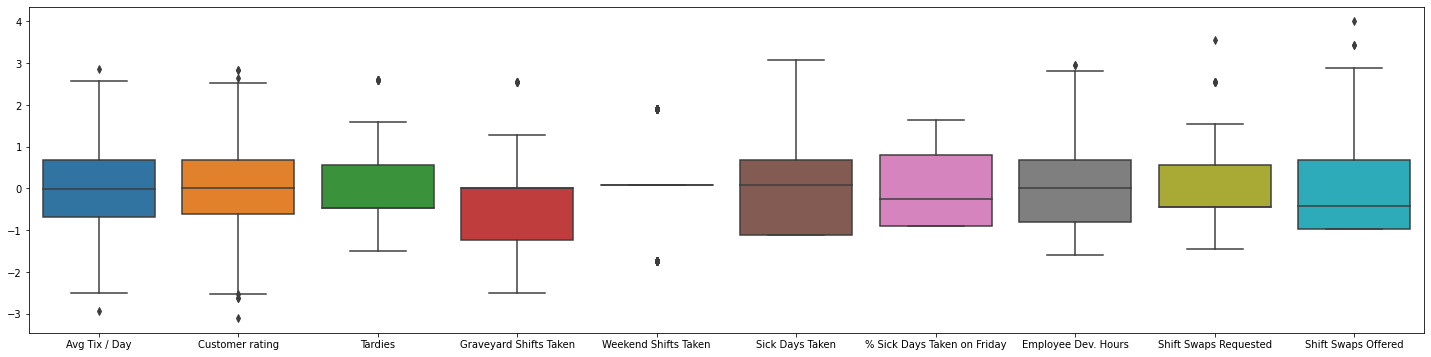

In [14]:
#ящиик с усами для стандартизированных данных
plt.figure(figsize=(25, 6))
boxplot=sns.boxplot(data=df_scaled)

# Результаты работы LOF для k=20

In [15]:
k=20
lof1 = LocalOutlierFactor(n_neighbors = 20,contamination=0.05)

In [16]:
lof20=lof1.fit_predict(scaled_df1)
lof1.negative_outlier_factor_ #значение LOF для каждого сотрудника

array([-1.20617374, -0.98298785, -1.13425488, -1.064671  , -1.18662081,
       -1.01009657, -1.05023131, -1.00308857, -1.07172262, -1.24923978,
       -0.99092361, -1.12115406, -1.0067191 , -1.07872947, -1.07974849,
       -0.99908571, -1.17699749, -1.03157728, -1.19505127, -1.32325058,
       -1.22967936, -1.08188402, -0.98721759, -1.26846475, -1.07287254,
       -1.09741601, -1.0081957 , -1.12532632, -0.99379557, -0.96616146,
       -1.02821758, -1.01063119, -1.02271018, -1.20560819, -1.00021027,
       -1.25636234, -1.07219671, -1.01477923, -1.12635566, -1.20828524,
       -1.10520917, -1.01842253, -0.99529084, -0.97780617, -1.00508967,
       -1.04626586, -1.11632462, -1.03950369, -1.07193019, -1.0365798 ,
       -0.98944616, -1.10159413, -0.99748998, -1.03991255, -1.01531089,
       -1.01262129, -1.0438088 , -1.15272325, -1.21545646, -0.97173251,
       -1.04756832, -1.21959277, -1.08167511, -1.13277345, -0.99391378,
       -1.04972059, -1.00117311, -1.09139685, -1.09869696, -0.98

###   Аномальные сотрудники

In [17]:
anomalies=np.where(lof20==-1)
print('Количество аномальных сотрудников:',len(anomalies[0]))
df.iloc[anomalies] #аномальные сотрудники

Количество аномальных сотрудников: 20


,Employee ID,Avg Tix / Day,Customer rating,Tardies,Graveyard Shifts Taken,Weekend Shifts Taken,Sick Days Taken,% Sick Days Taken on Friday,Employee Dev. Hours,Shift Swaps Requested,Shift Swaps Offered
9,137368,160.8,3.298914,1,3,1,0,0.000000,33,2,4
19,131975,143.1,4.373918,0,3,1,3,0.333333,0,2,3
23,133358,157.8,2.801553,2,3,2,7,0.428571,0,3,3
35,137095,161.0,3.140954,3,3,0,1,0.000000,1,3,6
93,132833,149.8,4.509262,3,2,1,6,1.000000,16,0,0
94,131243,152.9,4.799416,2,3,0,1,0.000000,15,2,0
97,141905,161.1,2.066015,1,2,0,4,0.500000,8,2,0
128,132990,159.4,3.691842,0,2,0,2,0.000000,21,3,8
145,143197,152.7,2.289146,3,2,1,3,0.000000,18,1,5
153,131385,159.0,2.957519,1,2,1,1,1.000000,0,4,7


###  Подбераю параметр contamination (уровень шума, доля выбросов), чтобы «аномальных» объектов было не больше 5

In [18]:
k=20
lof1_1 = LocalOutlierFactor(n_neighbors = k,contamination=0.005)
anomalies=np.where(lof1_1 .fit_predict(scaled_df1)==-1)
print('Количество аномальных сотрудников:',len(anomalies[0]))
df.iloc[anomalies] #аномальные сотрудники

Количество аномальных сотрудников: 2


,Employee ID,Avg Tix / Day,Customer rating,Tardies,Graveyard Shifts Taken,Weekend Shifts Taken,Sick Days Taken,% Sick Days Taken on Friday,Employee Dev. Hours,Shift Swaps Requested,Shift Swaps Offered
298,137155,165.3,4.493826,1,3,2,1,0.000000,30,1,7
373,143406,145.0,2.325385,3,1,0,6,0.833333,30,4,0


### Трое сотрудников с наибольшим значением LOF

In [19]:
lst1 = pd.Series(lof1_1.negative_outlier_factor_ )
i1 = lst1.nlargest(3)
indexes1=i1.index.values.tolist()
i1 #номера сотрудников и  значения LOF 

396   -0.950450
250   -0.957738
229   -0.958296
dtype: float64

In [20]:
df.iloc[i1.index.values.tolist()]#информация по данным сотрудникам

,Employee ID,Avg Tix / Day,Customer rating,Tardies,Graveyard Shifts Taken,Weekend Shifts Taken,Sick Days Taken,% Sick Days Taken on Friday,Employee Dev. Hours,Shift Swaps Requested,Shift Swaps Offered
396,144780,159.6,3.504737,1,2,1,2,0.0,15,1,1
250,132353,154.6,3.268767,1,2,1,2,0.0,12,1,0
229,138265,156.5,3.831322,2,2,1,0,0.0,12,1,0


In [21]:
df1.mean()#Средние показатели по всем работникам

Avg Tix / Day                  156.085750
Customer rating                  3.495270
Tardies                          1.465000
Graveyard Shifts Taken           1.985000
Weekend Shifts Taken             0.952500
Sick Days Taken                  1.875000
% Sick Days Taken on Friday      0.352173
Employee Dev. Hours             11.970000
Shift Swaps Requested            1.447500
Shift Swaps Offered              1.760000
dtype: float64

In [22]:
df_scaled.iloc[i1.index.values.tolist()]#стандартизированная информация по данным сотрудникам

,Avg Tix / Day,Customer rating,Tardies,Graveyard Shifts Taken,Weekend Shifts Taken,Sick Days Taken,% Sick Days Taken on Friday,Employee Dev. Hours,Shift Swaps Requested,Shift Swaps Offered
396,0.796681,0.020538,-0.478651,0.018902,0.086688,0.074777,-0.897681,0.406084,-0.448118,-0.419806
250,-0.336820,-0.491402,-0.478651,0.018902,0.086688,0.074777,-0.897681,0.004021,-0.448118,-0.972183
229,0.093911,0.729066,0.550706,0.018902,0.086688,-1.121654,-0.897681,0.004021,-0.448118,-0.972183


In [23]:
df_scaled.mean()#Средние показатели по всем работникам

Avg Tix / Day                 -4.442002e-15
Customer rating               -1.248446e-15
Tardies                       -6.661338e-17
Graveyard Shifts Taken        -1.065814e-16
Weekend Shifts Taken          -1.313533e-16
Sick Days Taken                5.374173e-17
% Sick Days Taken on Friday    5.717649e-17
Employee Dev. Hours           -1.745826e-16
Shift Swaps Requested         -1.258715e-16
Shift Swaps Offered            7.049916e-17
dtype: float64

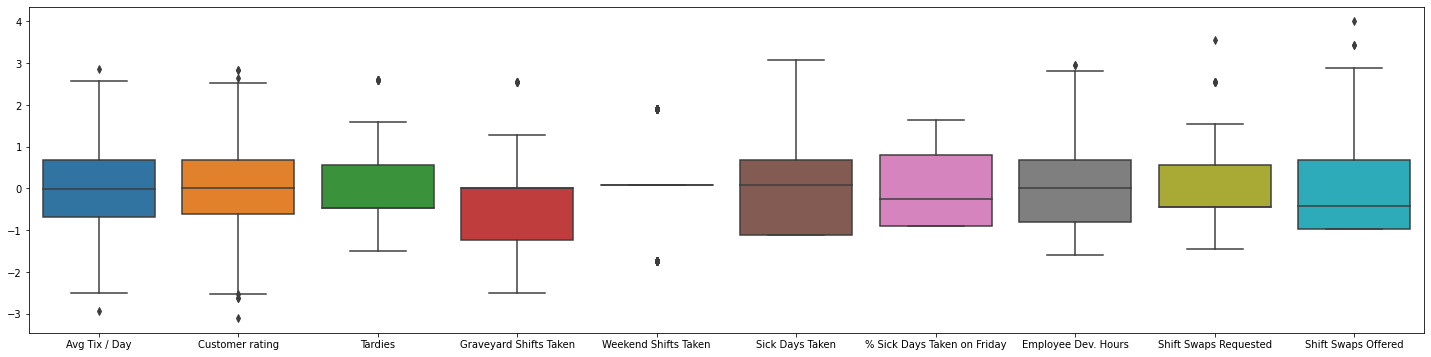

In [24]:
#ящиик с усами для стандартизированных данных
plt.figure(figsize=(25, 6))
boxplot=sns.boxplot(data=df_scaled)